# 1. Problem Statement

* Construct a classification model based on the available data and evaluate its efficacy. 
* Performing various activities pertaining to the data such as, preparing the dataset for analysis; investigating the relationships in the data set with visualization; creating a model; evaluating the performance of the classification model.
* Construct a decision tree-based model, and use the model to predict whether a client will subscribe for a term deposit or not.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
import pydotplus
from imblearn.over_sampling import SMOTENC
import os
import seaborn as sb

C:\Users\VAAKASH\AppData\Local\Continuum\Anaconda3-5.2.0\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\VAAKASH\AppData\Local\Continuum\Anaconda3-5.2.0\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
main_df = pd.read_excel("Bank Data for case study assignment.xlsx")

In [3]:
#Sample Data
main_df.head()

,age,job,marital status,education,credit default?,housing loan?,Personal loan,y
0,30,unemployed,married,primary,no,no,no,no
1,33,services,married,secondary,no,yes,yes,no
2,35,management,single,tertiary,no,yes,no,no
3,30,management,married,tertiary,no,yes,yes,no
4,59,blue-collar,married,secondary,no,yes,no,no


# ------------------------------------------------------------------------------------------

# 2. Data Preprocessing

### Checking Column names

In [4]:
main_df.columns

Index(['age', 'job', 'marital status ', 'education', 'credit default?',
       'housing loan?', 'Personal loan', 'y'],
      dtype='object')

### Correcting column names - removing unwanted '  ' and '?' from columns

In [5]:


main_df.columns = ['age', 'job', 'marital status', 'education', 'credit default',
       'housing loan', 'personal loan', 'y']

In [6]:
main_df.columns

Index(['age', 'job', 'marital status', 'education', 'credit default',
       'housing loan', 'personal loan', 'y'],
      dtype='object')

### Attribute details

In [7]:
main_df.describe(include='all')

,age,job,marital status,education,credit default,housing loan,personal loan,y
count,1021.000000,1019,1020,1020,1020,1019,1019,1021
unique,NaN,12,3,4,2,3,2,2
top,NaN,blue-collar,married,secondary,no,yes,no,no
freq,NaN,217,617,524,998,583,869,897
mean,41.066601,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,10.400013,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,19.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Details w.r.t each column

In [8]:

main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021 entries, 0 to 1020
Data columns (total 8 columns):
age               1021 non-null int64
job               1019 non-null object
marital status    1020 non-null object
education         1020 non-null object
credit default    1020 non-null object
housing loan      1019 non-null object
personal loan     1019 non-null object
y                 1021 non-null object
dtypes: int64(1), object(7)
memory usage: 63.9+ KB


In [9]:
#Total number of rows

len(main_df)

1021

### Number of nulls(NaN) in each column

In [10]:

main_df.isnull().sum()

age               0
job               2
marital status    1
education         1
credit default    1
housing loan      2
personal loan     2
y                 0
dtype: int64

### Number of rows with atleast 1 null(NaN)

In [11]:

main_df[main_df.isnull().any(axis=1)]

,age,job,marital status,education,credit default,housing loan,personal loan,y
79,40,NaN,married,secondary,no,yes,no,no
97,30,admin.,single,NaN,no,no,no,no
108,56,unemployed,NaN,primary,no,no,no,yes
109,27,housemaid,married,primary,no,NaN,NaN,no
168,48,technician,married,tertiary,NaN,no,no,no
1000,38,admin.,married,secondary,no,yes,NaN,no
1004,42,NaN,single,secondary,no,yes,yes,yes
1016,33,services,married,secondary,no,NaN,no,no


### % of rows having atleast 1 NaN

In [12]:

main_df.isnull().any(axis=1).sum()*100/len(main_df)

0.7835455435847208

### As the % of rows is very less (< 1%), we have decided to drop these rows.

In [13]:
main_df = main_df[main_df.notnull().all(axis=1)]
len(main_df)

1013

In [14]:
#Confirming there are no null(NaNs) in the dataset

main_df.isnull().sum()

age               0
job               0
marital status    0
education         0
credit default    0
housing loan      0
personal loan     0
y                 0
dtype: int64

### Checking unique values in each column

In [15]:
for i in main_df.columns[1:]:
    print(main_df[i].value_counts())

blue-collar      217
management       212
technician       177
admin.           105
services          92
self-employed     52
retired           46
entrepreneur      32
unemployed        28
student           23
housemaid         19
unknown           10
Name: job, dtype: int64
married     612
single      279
divorced    122
Name: marital status, dtype: int64
secondary    520
tertiary     302
primary      149
unknown       42
Name: education, dtype: int64
no     991
yes     22
Name: credit default, dtype: int64
yes      580
no       432
xxxyy      1
Name: housing loan, dtype: int64
no     864
yes    149
Name: personal loan, dtype: int64
no     891
yes    122
Name: y, dtype: int64


### We can see that column 'housing default' has a value with label 'xxxyy'. This looks like a dummy value, hence we will be dropping this row.

In [16]:
main_df = main_df[main_df['housing loan'] !=  'xxxyy']
len(main_df)

1012

# ------------------------------------------------------------------------------------------

# 3. Exploratory data analysis

## 3a) Univariate Analysis

### Working with individual columns

## I. Age

(array([ 26., 156., 298., 187., 159., 123.,  43.,  11.,   6.,   3.]),
 array([19. , 25.5, 32. , 38.5, 45. , 51.5, 58. , 64.5, 71. , 77.5, 84. ]),
 <a list of 10 Patch objects>)

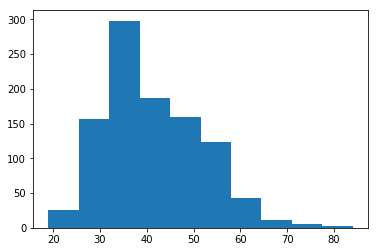

In [17]:
plt.hist(main_df['age'])

In [18]:
main_df.describe(include='all')

,age,job,marital status,education,credit default,housing loan,personal loan,y
count,1012.000000,1012,1012,1012,1012,1012,1012,1012
unique,NaN,12,3,4,2,2,2,2
top,NaN,blue-collar,married,secondary,no,yes,no,no
freq,NaN,217,611,520,990,580,863,890
mean,41.063241,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,10.399248,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,19.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56]), <a list of 57 Text xticklabel objects>)

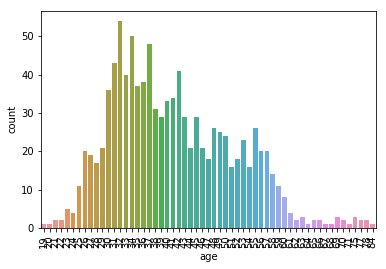

In [19]:
sns.countplot(data = main_df, x = "age")
plt.xticks(rotation=90)

## II. Job

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

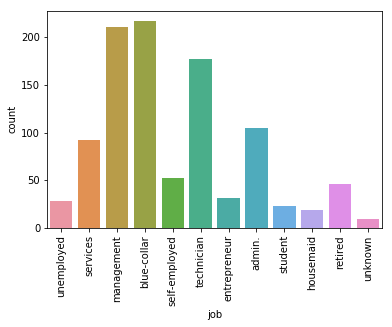

In [20]:
g = sns.countplot(data = main_df, x = "job")
plt.xticks(rotation=90)

In [21]:
main_df['job'].value_counts()*100/len(main_df)

blue-collar      21.442688
management       20.849802
technician       17.490119
admin.           10.375494
services          9.090909
self-employed     5.138340
retired           4.545455
entrepreneur      3.162055
unemployed        2.766798
student           2.272727
housemaid         1.877470
unknown           0.988142
Name: job, dtype: float64

In [22]:
# Removing unknowns

main_df = main_df[main_df['job'] != 'unknown']
len(main_df)

1002

### Lets merge some of these job categories together

earning = ['management', 'unemployed', 'blue-collar', 'entrepreneur', 'self-employed', 'technician', 'services', 'housemaid', 'admin.']

non-earning = ['student', 'retired']



In [23]:
main_df['job'] = main_df.apply(lambda row: 'earning' if row['job'] in ['management', 'blue-collar', 'entrepreneur', 'self-employed', 'technician', 'services', 'housemaid', 'admin.'] else 'non-earning', axis=1)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

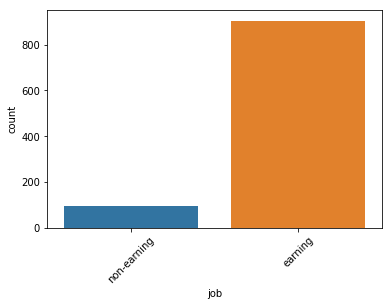

In [24]:
g = sns.countplot(data = main_df, x = "job")
plt.xticks(rotation=45)

## III. Education

In [25]:
main_df['education'].value_counts()*100/len(main_df)

secondary    51.596806
tertiary     29.740519
primary      14.770459
unknown       3.892216
Name: education, dtype: float64

In [26]:
#Removing unknowns

main_df = main_df[main_df['education'] != 'unknown']
len(main_df)

963

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

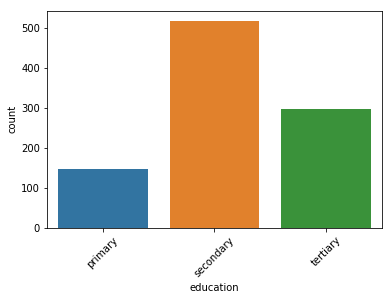

In [27]:
g = sns.countplot(data = main_df, x = "education")
plt.xticks(rotation=45)

## IV. Marital Status

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

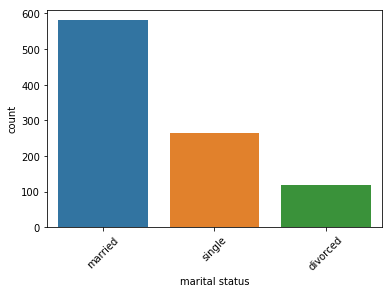

In [28]:
g = sns.countplot(data = main_df, x = "marital status")
plt.xticks(rotation=45)

## V. Credit Default

(array([0, 1]), <a list of 2 Text xticklabel objects>)

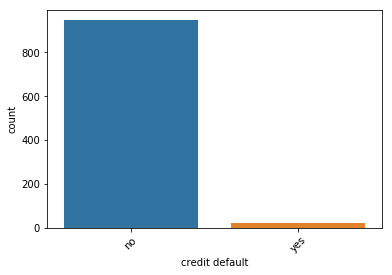

In [29]:
g = sns.countplot(data = main_df, x = "credit default")
plt.xticks(rotation=45)

## VI. Housing Loan

(array([0, 1]), <a list of 2 Text xticklabel objects>)

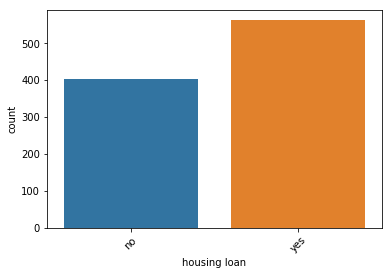

In [30]:
g = sns.countplot(data = main_df, x = "housing loan")
plt.xticks(rotation=45)

#### There is one record that has housing loan as 'xxxyy' this is is clearly data that we dont need, hence lets drop this row

(array([0, 1]), <a list of 2 Text xticklabel objects>)

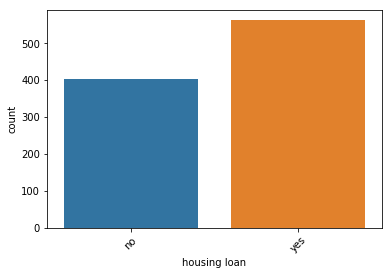

In [31]:
g = sns.countplot(data = main_df, x = "housing loan")
plt.xticks(rotation=45)

## VII. Personal Loan

(array([0, 1]), <a list of 2 Text xticklabel objects>)

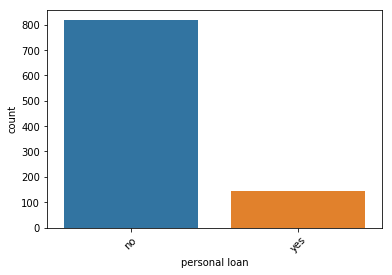

In [32]:
g = sns.countplot(data = main_df, x = "personal loan")
plt.xticks(rotation=45)

## VIII. y Variable

(array([0, 1]), <a list of 2 Text xticklabel objects>)

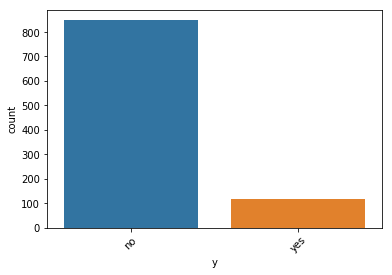

In [33]:
g = sns.countplot(data = main_df, x = "y")
plt.xticks(rotation=45)

## 3b) Bivariate Analysis

In [34]:
def bivariate_analysis(column, y, subplot):
    rcParams['figure.figsize'] = 20,12
    sb.set(font_scale=1)
    plt.subplot(3,3,subplot)
    ctb=pd.crosstab(main_df[column], main_df[y]).apply(lambda r: round(r/r.sum(),2), axis=1)
    stacked = ctb.stack().reset_index().rename(columns={0:'percentage'})
    ax = sb.barplot(x=stacked[column], y=stacked.percentage, hue=stacked[y])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.set_xlabel(column) 
    ax.set_ylabel("Yes/No") 
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

### Plotting y variable against all dataset varaibles.

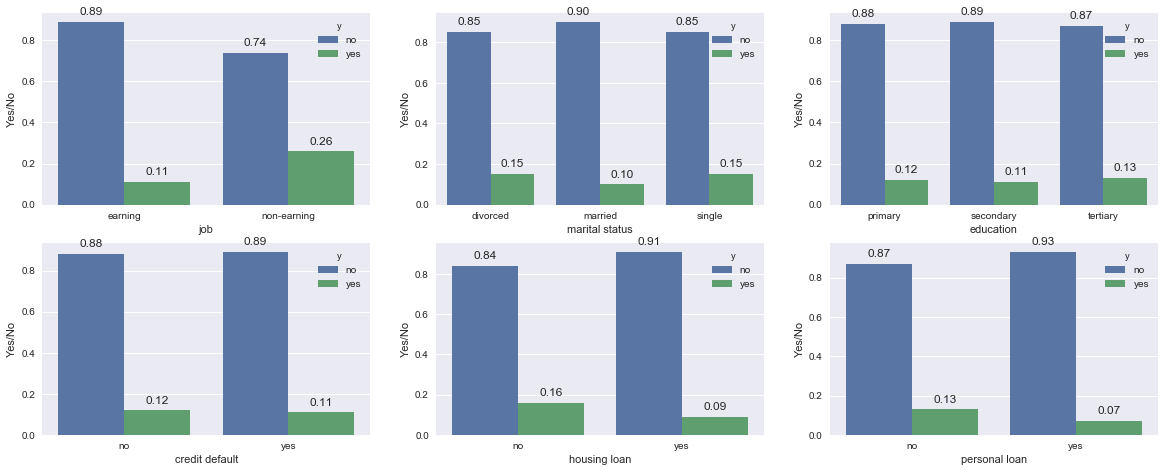

In [35]:
i=1
for column in main_df.columns[0:(len(main_df.columns)-1)]:
    if (main_df[column].dtypes == 'object'):
        bivariate_analysis(column,'y',i)
        i=i+1


#### Checking the class balance

In [36]:
main_df['y'].value_counts()*100/len(main_df)

no     87.954309
yes    12.045691
Name: y, dtype: float64

## Processing Categorical Variables

### The variables we have are Continuous, Nominal and Ordinal
### a). Continuous Variables: ['age']
* No modifications done, We will leave the age data as such. 

### b). Nomianl Variables : ['job', 'education', 'credit default','housing loan', 'personal loan', 'y']]
* We are going to label them using LabelEncoder keeping their order entact.

In [37]:
cols = main_df.columns
cols

Index(['age', 'job', 'marital status', 'education', 'credit default',
       'housing loan', 'personal loan', 'y'],
      dtype='object')

In [38]:
# Encoding the variable

from collections import defaultdict
d = defaultdict(LabelEncoder)

fit = main_df[['age', 'job', 'education', 'credit default',
       'housing loan', 'personal loan', 'y']].apply(lambda x: d[x.name].fit_transform(x))

# Inverse the encoded
fit.apply(lambda x: d[x.name].inverse_transform(x))

# Using the dictionary to label future data
main_df[['age', 'job', 'education', 'credit default',
       'housing loan', 'personal loan', 'y']] = main_df[['age', 'job', 'education', 'credit default',
       'housing loan', 'personal loan', 'y']].apply(lambda x: d[x.name].transform(x))

In [39]:
main_df.head()

,age,job,marital status,education,credit default,housing loan,personal loan,y
0,11,1,married,0,0,0,0,0
1,14,0,married,1,0,1,1,0
2,16,0,single,2,0,1,0,0
3,11,0,married,2,0,1,1,0
4,40,0,married,1,0,1,0,0


### c). Nominal Variables = ['marital status']
* We encode this variable using get_dummies as the data does not give any order related information.

In [40]:
main_df = pd.get_dummies( main_df, columns = ['marital status'] )

main_df.head()

,age,job,education,credit default,housing loan,personal loan,y,marital status_divorced,marital status_married,marital status_single
0,11,1,0,0,0,0,0,0,1,0
1,14,0,1,0,1,1,0,0,1,0
2,16,0,2,0,1,0,0,0,0,1
3,11,0,2,0,1,1,0,0,1,0
4,40,0,1,0,1,0,0,0,1,0


## Correlation Analysis

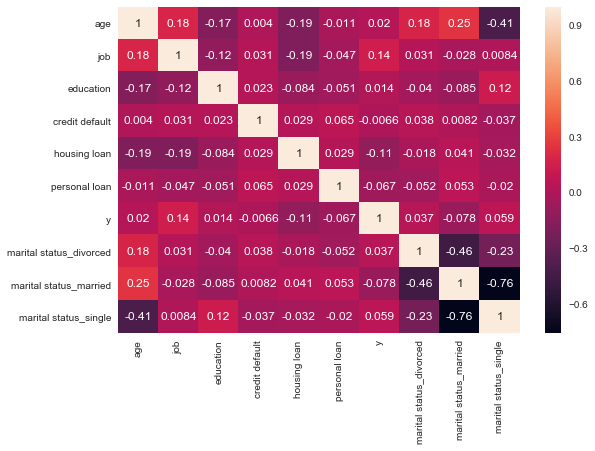

In [41]:
f, ax = plt.subplots(figsize=(9, 6))
sb.heatmap(main_df.corr(), annot=True)
plt.show()

# ------------------------------------------------------------------------------------------

# 4. Select Training data, test data 

In [42]:
#Creating x and y datasets

X = main_df.drop(['y'], axis=1)
y = main_df['y']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=100)

# ------------------------------------------------------------------------------------------

# 5. Train the model 

In [44]:


clf = DecisionTreeClassifier(criterion='gini', min_samples_split = 5, min_samples_leaf = 1)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# ------------------------------------------------------------------------------------------

# 6. Testing / Evaluating the model (Predictions and reporting)

In [45]:
y_pred = clf.predict(X_test)

In [46]:
def accuray_parameters(y_test, y_pred):
    rcParams['figure.figsize'] = 4,2
    print("Accuracy: ",accuracy_score(y_test,y_pred))
    
    confusion = confusion_matrix(y_test, y_pred)

    TP = confusion[1,1]
    TN = confusion[0,0]
    FP = confusion[0,1]
    FN = confusion[1,0]

    sns.heatmap(confusion, annot=True, cmap='YlGnBu', fmt='.2f')
    plt.show()
    
    recall = TP/ (TP + FN)
    print("Recall: ", recall)

    precision = TP / (TP + FP)
    print("Precision: ", precision)
    
    print("F1 Score: ", f1_score(y_test, y_pred))


In [47]:
def save_tree_as_pdf(clf, file_name):
    if os.path.exists(file_name):
        os.remove(file_name)
    dot_data = StringIO()
    export_graphviz(clf, out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    Image(graph.create_png())

    graph.write_pdf(file_name)


## Model Accuracy

Accuracy:  0.8650519031141869


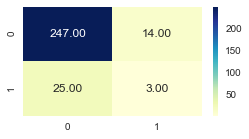

Recall:  0.10714285714285714
Precision:  0.17647058823529413
F1 Score:  0.13333333333333333


In [48]:
accuray_parameters(y_test, y_pred)

In [49]:
save_tree_as_pdf(clf,'tree.pdf')

InvocationException: GraphViz's executables not found

# 7. Assumptions made/Actions Taken:

* As the % of rows with atleast one null(NaN) value is very less (< 1%), we have decided to drop these rows.
* We can see that column 'housing default' has a value with label 'xxxyy'. This looks like a dummy value, hence we will be dropping this row.
* Merging Job Categories:

    * 1. earning = ['management', 'blue-collar', 'entrepreneur', 'self-employed', 'technician', 'services', 'housemaid', 'admin.']
    
    * 2. non-earning = ['student', 'retired', 'unemployed']
* Rows with 'unknown' values from 'job' and 'education' columns were also dropped as the % was quite low. (less than 1% and around 3% respectively)

# ------------------------------------------------------------------------------------------

# 8. Improvements

### 1. Avoid Data Imbalance for better Recall 

In [50]:
main_df['y'].value_counts()*100/len(main_df)

0    87.954309
1    12.045691
Name: y, dtype: float64


* We can see that the class labels are 88%(no) and 12%(yes) respectively, this will result in our model being biased towards 'no'. 
To handle this we can do the following:
    * SMOTE : Use SMOTE to oversample the minority class datapoints and then create a model that has good exposure to minority class as well. 
    * use class_weight : We can use class_weight to DecisionTreeClassifier to penalise the model extra for every time it gets the minority class wrong.  
    
#### Both of these steps will help us in increasing the Recall value at the cost of Precision.

In [62]:
#SMOTE 

sm = SMOTENC(categorical_features=[1,2,3,4,5,6,7,8],sampling_strategy = 0.5,random_state=100)
x_res, y_res = sm.fit_sample(X_train, y_train)

In [64]:
clf_sm = DecisionTreeClassifier(criterion='gini', min_samples_split = 5, min_samples_leaf = 1)
clf_sm.fit(x_res, y_res)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [69]:
y_pred_sm = clf_sm.predict(X_test)

Accuracy:  0.8408304498269896


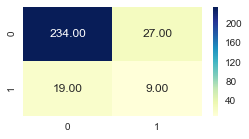

Recall:  0.32142857142857145
Precision:  0.25
F1 Score:  0.28125000000000006


In [70]:
accuray_parameters(y_test, y_pred_sm)

### We can see that though the accuracy has gone down, but the Recall and Precision have gone up considerably.

##### -------------------------------------------------------------------------------------------------------------------------------

### 2. Remove correlated features to make the model simpler
* From the below correlation matrix it is evident that columns like 'marital status_sinle' and 'marital status_married' are highly correlated. 
#### Thus we can drop 'marital status_married' 
* This also makes sense because if we know marital status_single and marital status_divorced, we can very well know if the person is married or not, thus this feature as such does not bring any new information. Thus we can drop this feature.
#### This will not affect the accuracy but we will end up with a model that is simpler and has lesser number of features.

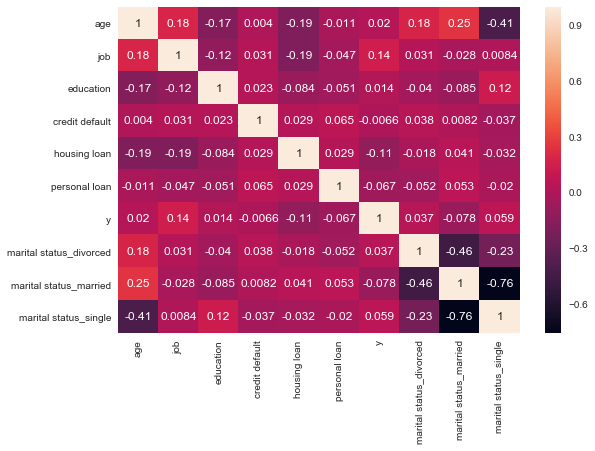

In [51]:
f, ax = plt.subplots(figsize=(9, 6))
sb.heatmap(main_df.corr(), annot=True)
plt.show()

##### -------------------------------------------------------------------------------------------------------------------------------

### 3. Use an ensemble model like Random Forest
* The use of an Ensemble model makes sure that the model is not over fitting which Decision Trees usually do.

In [72]:
clf_rf = RandomForestClassifier(n_estimators = 100, criterion='gini', min_samples_split = 5, min_samples_leaf = 1)
clf_rf.fit(x_res, y_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [73]:
y_pred_rf = clf_rf.predict(X_test)

Accuracy:  0.8027681660899654


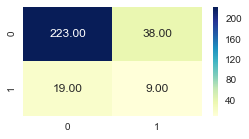

Recall:  0.32142857142857145
Precision:  0.19148936170212766
F1 Score:  0.24


In [74]:
accuray_parameters(y_test, y_pred_rf)